In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("online_retail_II.csv")
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
df=df.dropna(subset=['Customer ID'])

In [8]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
df1=df[df['Quantity']>0]
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [13]:
df2=df1.copy()
df2['Total Sales']=df1['Price']*df1['Quantity']

In [15]:
df2['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
print(df2.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
Total Sales           float64
dtype: object


Calculate RFM metrics
 R > Recency: How recently the customer purchased
 F > Frequency: How recently the customer purchased
 M > Monetary: How much money the customer spent

In [22]:
#Calculate RFM metrics

today_date = df2['InvoiceDate'].max() + pd.Timedelta(days=1) #Setting the reference “today” date as one day after the last transaction in the dataset.

rfm=df2.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'Invoice': 'nunique', #number of unique values
    'Total Sales': 'sum'
})

In [24]:
rfm.columns=['Recency','Frequency','Monetary']

pd.qcut() means:Divide data into equal-sized groups (quantiles). In other terms,pd.qcut() divides customers into equal groups and assigns scores so we can rank them based on recency, frequency, and spending.

In [27]:
#Creating RFM Scores
rfm['R_score'] = pd.qcut(
    rfm['Recency'].rank(method='first'),
    4,
    labels=[4,3,2,1]
)

rfm['F_score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)

rfm['M_score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    4,
    labels=[1,2,3,4]
)
#What does labels= do?
#It assigns scores to each group.

'''Important logic in terms of Recency score:
Lower Recency = better customer
Recent buyers are more valuable
So we reverse the scores'''

'''Logic in terms of Frequency Score:
Higher frequency = better customer'''

'''Logic in terms of Monetary Score:
More spending = better customer'''


'Logic in terms of Monetary Score:\nMore spending = better customer'

In [28]:
rfm['RFM_score'] = (
    rfm['R_score'].astype(str) +
    rfm['F_score'].astype(str) +
    rfm['M_score'].astype(str)
)

In [29]:
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
Customer ID,,,,,,,
12346.0,326,12,77556.46,2,4,4,244
12347.0,2,8,5633.32,4,4,4,444
12348.0,75,5,2019.40,3,3,3,333
12349.0,19,4,4428.69,4,3,4,434
12350.0,310,1,334.40,2,1,1,211


In [30]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total Sales
count,805620.000000,805620,805620.000000,805620.000000,805620.000000
mean,13.307665,2011-01-02 10:26:35.704326144,3.206279,15331.856250,22.024564
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,2.000000,2010-07-07 12:08:00,1.250000,13982.000000,4.950000
50%,5.000000,2010-12-03 15:10:00,1.950000,15271.000000,11.850000
75%,12.000000,2011-07-28 13:28:00,3.750000,16805.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,144.306739,NaN,29.197901,1696.768395,224.032150


In [32]:
#create segmentation function:

def segment_customer(row):
    if row['RFM_score'] in ['444','443','434']:
        return 'Champions'
    elif row['RFM_score'] in ['344','343','334']:
        return 'Loyal Customers'
    elif row['RFM_score'] in ['244','243']:
        return 'Potential Loyalists'
    elif row['RFM_score'] in ['144','143']:
        return 'New Customers'
    elif row['RFM_score'] in ['211','221']:
        return 'At Risk'
    elif row['RFM_score'] in ['111','112']:
        return 'Lost Customers'
    else:
        return 'Others'

In [34]:
rfm['segment'] = rfm.apply(segment_customer, axis=1)
rfm['segment'].value_counts()

segment
Others                 3169
Champions               821
Lost Customers          735
Loyal Customers         552
At Risk                 367
Potential Loyalists     199
New Customers            38
Name: count, dtype: int64

In [31]:
# Visulaization Section

#(1) Distribution of Recency, Frequency, Monetary
#(2) Count of customers per segment
#(3) Bar chart: segment vs average revenue

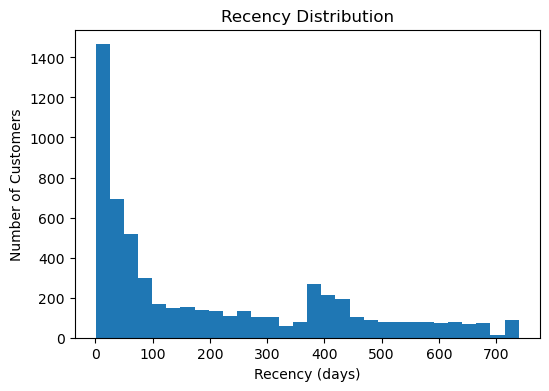

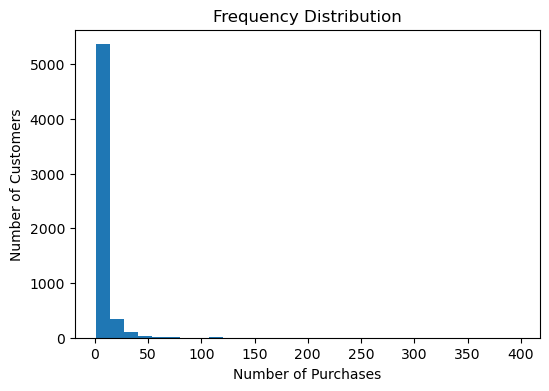

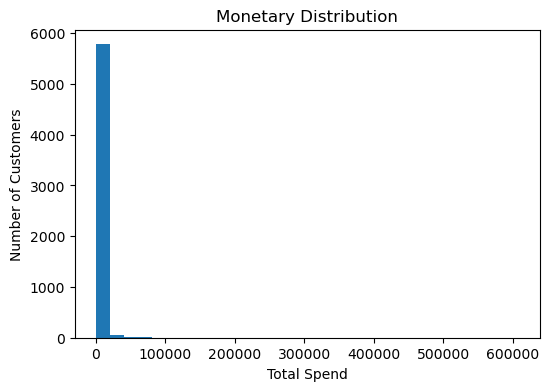

In [36]:
#(1) Distribution of Recency,Frequency,Monetary

# Recency distribution
plt.figure(figsize=(6,4))
plt.hist(rfm['Recency'], bins=30)
plt.title("Recency Distribution")
plt.xlabel("Recency (days)")
plt.ylabel("Number of Customers")
plt.show()

# Frequency distribution
plt.figure(figsize=(6,4))
plt.hist(rfm['Frequency'], bins=30)
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

# Monetary distribution
plt.figure(figsize=(6,4))
plt.hist(rfm['Monetary'], bins=30)
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")
plt.show()

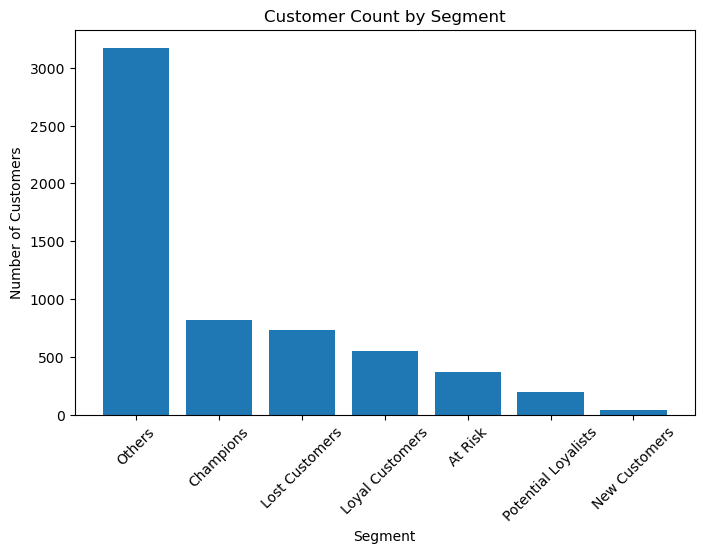

In [37]:
#(2)Count of customers per segment

segment_counts = rfm['segment'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(segment_counts.index, segment_counts.values)
plt.title("Customer Count by Segment")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

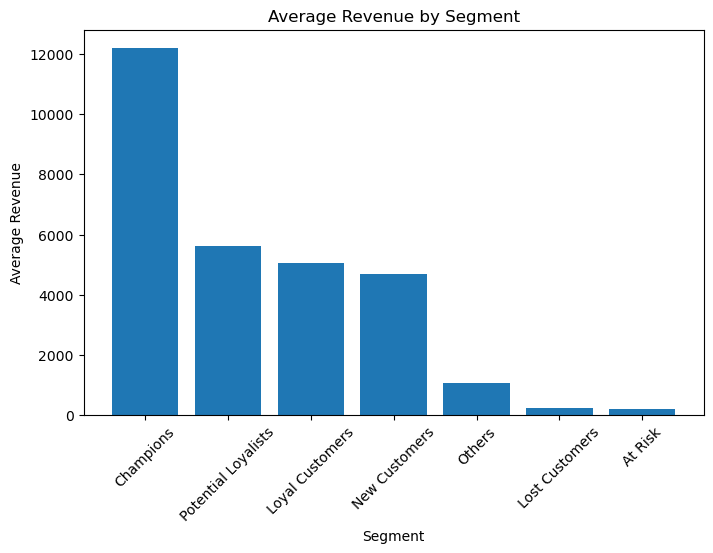

In [38]:
#(3)  Bar chart: segment vs average revenue

segment_revenue = rfm.groupby('segment')['Monetary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(segment_revenue.index, segment_revenue.values)
plt.title("Average Revenue by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()

Business Insights:

Hight impact is on others segment where the count of customers is high and then second position goes to champions.
At risk customers should be given more retention offers
Lost Customers have the lowest sending and